In [1]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

'\nDựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng\nDataset: FuelConsumptionCo2.csv\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and quick view data

In [3]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# ? rows ? columns ? non-null ? type ? duplicate

In [5]:
data.shape

(1067, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
data.duplicated().sum()

0

# Data Cleaning

In [8]:
data.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [9]:
for c in data.select_dtypes('object').columns:
    data[c] = data[c].astype('category')

In [10]:
data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']] = data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

In [12]:
# name = ['Lan','Phuong','Luong'] -> object
# class_school = ['cap 1','cap 2','cap 3'] -> object -> category (phân loại)

In [ ]:
# - Descriptive analysis
# - Diagnostic analysis

# Descriptive Analysis

In [14]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
data['MODELYEAR'].unique()

array([2014])

In [16]:
data.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Distribution_of_Annual_Household_Income_in_the_United_States_2010.png)

https://www.youtube.com/watch?v=2oJldeE4JcU

https://www.youtube.com/watch?v=rzFX5NWojp0m

<Figure size 1008x720 with 0 Axes>

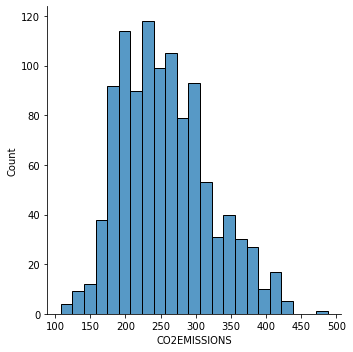

In [17]:
plt.figure(figsize=(14,10))
sns.displot(data['CO2EMISSIONS'])
plt.show()

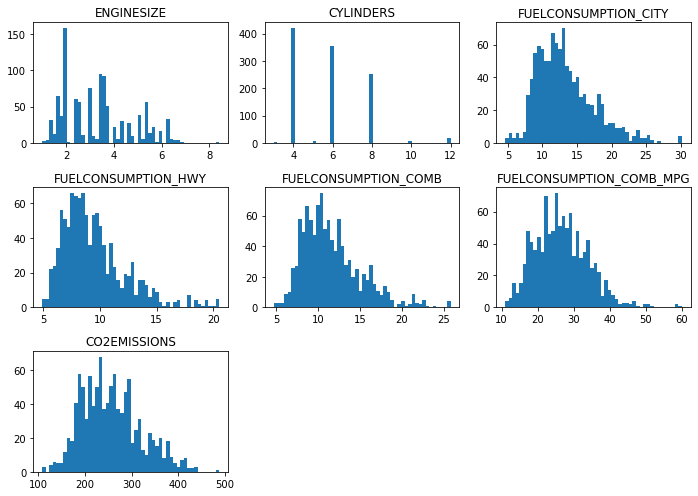

In [18]:
df_num = data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

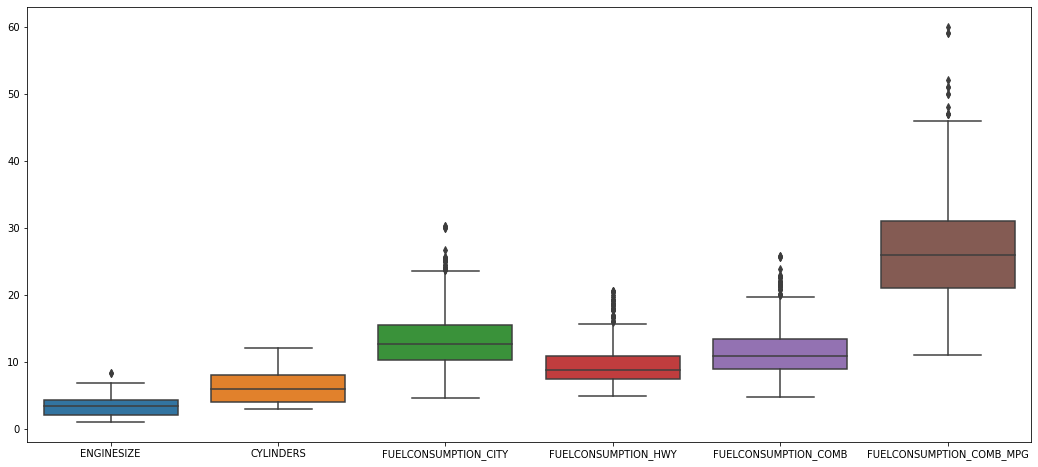

In [19]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data.select_dtypes(['int64','float64']).drop(['MODELYEAR','CO2EMISSIONS'],axis=1))

In [20]:
# 1.5IQR Rule

# Diagnostic Analysis

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [21]:
data.select_dtypes(['int64','float64']).corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


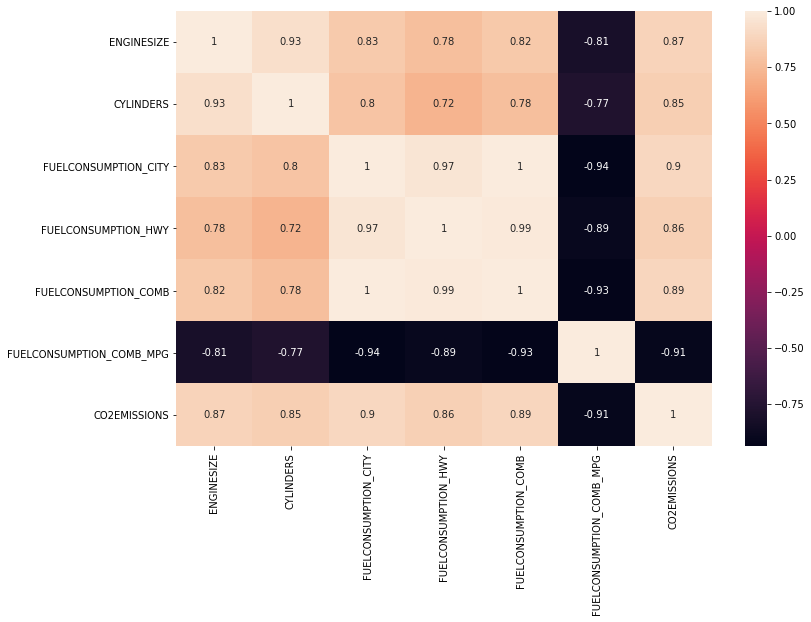

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(['int64','float64']).drop('MODELYEAR',axis=1).corr(),annot=True)

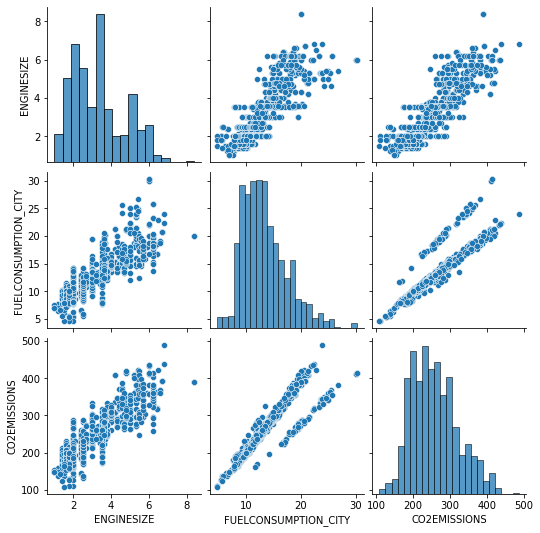

In [23]:
sns.pairplot(data[['ENGINESIZE','FUELCONSUMPTION_CITY','CO2EMISSIONS']])

In [24]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
data.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


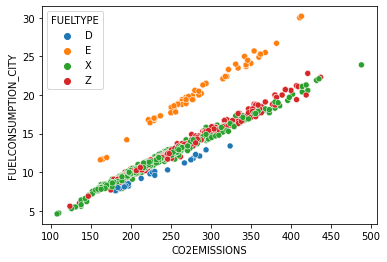

In [26]:
sns.scatterplot(data=data,x='CO2EMISSIONS',y='FUELCONSUMPTION_CITY',hue='FUELTYPE')

# Feature Selection & Training

![](https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2020/03/Linear_Regression_fit_with_Matrix_Multiplication.jpg?fit=594%2C396&ssl=1)

https://www.youtube.com/watch?v=iIUq0SqBSH0

In [27]:
# y -> predict
# x -> feature
# y = ax + b

# a = 3, b = 4 -> y = 3x + 4
# x = 5 -> y = 19


# row1: 20 = a.3 + b -> a,b
# row2: 19 = a.3.5 + b -> a,b

In [28]:
# x: ENGINESIZE
# y: CO2EMISSIONS

In [29]:
from sklearn.linear_model import LinearRegression # model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # evaluation metrics
from sklearn.model_selection import train_test_split

In [30]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']],data['CO2EMISSIONS'])

LinearRegression()

In [31]:
model.coef_

array([39.12519979])

In [32]:
model.intercept_

125.3040994953569

In [33]:
manual_result = pd.DataFrame(model.coef_ * data['ENGINESIZE'] + model.intercept_)
manual_result.rename(columns={'ENGINESIZE':'CO2EMISSIONS'},inplace=True)
manual_result

,CO2EMISSIONS
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [34]:
model_result = pd.DataFrame(model.predict(data[['ENGINESIZE']]))
model_result.columns = ['CO2EMISSIONS_model']
model_result

,CO2EMISSIONS_model
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [35]:
# pd.DataFrame({'manual_result':manual_result,'model_result':model_result})
pd.DataFrame({'manual_result':model.coef_ * data['ENGINESIZE'] + model.intercept_,'model_result':model.predict(data[['ENGINESIZE']])})

,manual_result,model_result
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


![](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=v2&px=400)

In [36]:
mean_absolute_error, mean_squared_error, r2_score

(<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

![](https://i.imgur.com/19LNbyQ.jpeg)

![](https://pbs.twimg.com/media/FAX6eHvWEAIWBjB.png)

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSR-and-SST.jpg)

In [37]:
mean_absolute_error(data['CO2EMISSIONS'],model_result)

23.346887834400427

In [38]:
mean_squared_error(data['CO2EMISSIONS'],model_result)

946.3140527188749

In [39]:
r2_score(data['CO2EMISSIONS'],model_result)

0.7641458597854816

# Evaluation

![](https://spidec.files.wordpress.com/2017/05/fittings.jpg?w=702)

**Evaluation methods**
- Train - test
- Train - val - test
-> `train_test_split()`
- K-fold cross validation (K=5, 10, ...)
![](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [40]:
from sklearn.model_selection import KFold, cross_val_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE']],data['CO2EMISSIONS'],test_size=0.2,shuffle=True,random_state=42)
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(LinearRegression(), X_train, y_train, scoring='r2', cv=folds)

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

# Tuning

In [42]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [44]:
model = LinearRegression()
model.fit(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']],data['CO2EMISSIONS'])
result = model.predict(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
r2_score(data['CO2EMISSIONS'],result)

0.8627973904839377

In [45]:
r2_score(data['CO2EMISSIONS'],model_result)

0.7641458597854816

In [46]:
'''
Optimize model
GridsearchCV
'''

'\nOptimize model\nGridsearchCV\n'

In [47]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.model_selection import GridSearchCV

In [48]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data.select_dtypes(exclude='category').drop(['MODELYEAR','CO2EMISSIONS'],axis=1),data['CO2EMISSIONS'],test_size=0.2,shuffle=True,random_state=42)

In [50]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,1.4,4,8.5,6.9,7.8,36
106,4.4,8,15.0,9.8,12.7,22
585,3.0,6,11.2,8.4,9.9,29
55,3.0,6,13.2,9.2,11.4,25
213,5.3,8,18.3,14.2,16.5,17


In [51]:
# Create k fold
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Range to tune
hyper_params = [{'n_features_to_select':list(range(1,10))}]

# Specify model
model = LinearRegression()
model.fit(X_train,y_train)
rfe = RFE(model)

# Tuning with GridSearchCV
model_cv = GridSearchCV(estimator=rfe,
                       param_grid=hyper_params,
                       scoring='r2',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009572,0.003487,0.002695,0.000978,1,{'n_features_to_select': 1},0.725086,0.743304,0.783856,0.769079,...,0.759962,0.022320,9,0.771172,0.769215,0.759192,0.762272,0.760187,0.764408,0.004867
1,0.005508,0.001540,0.001626,0.000038,2,{'n_features_to_select': 2},0.824826,0.849626,0.857822,0.860602,...,0.852395,0.015123,8,0.860673,0.856333,0.854544,0.853243,0.851463,0.855251,0.003145
2,0.004123,0.000134,0.001599,0.000037,3,{'n_features_to_select': 3},0.826566,0.849762,0.860875,0.867154,...,0.854484,0.015411,6,0.861043,0.857068,0.860448,0.858146,0.858240,0.858989,0.001504
3,0.003564,0.000078,0.001579,0.000030,4,{'n_features_to_select': 4},0.826286,0.848690,0.857495,0.865247,...,0.853125,0.014997,7,0.861120,0.857275,0.860968,0.858326,0.858297,0.859197,0.001555
4,0.003880,0.001181,0.001693,0.000164,5,{'n_features_to_select': 5},0.829856,0.858337,0.881529,0.865378,...,0.864338,0.020084,5,0.866031,0.860698,0.886114,0.858336,0.884493,0.871134,0.011846
5,0.003019,0.000341,0.002658,0.000919,6,{'n_features_to_select': 6},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
6,0.002773,0.000243,0.001801,0.000160,7,{'n_features_to_select': 7},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
7,0.003192,0.000226,0.001618,0.000038,8,{'n_features_to_select': 8},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
8,0.003262,0.000544,0.002024,0.000399,9,{'n_features_to_select': 9},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881


In [53]:
cv_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [54]:
'param_n_features_to_select'
'mean_train_score'
'mean_test_score'

'mean_test_score'

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


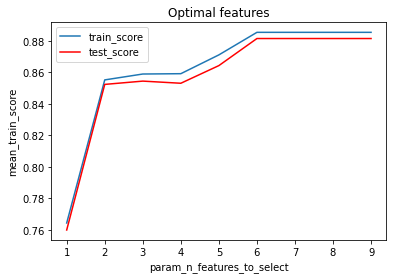

<Figure size 864x576 with 0 Axes>

In [55]:
sns.lineplot(cv_result['param_n_features_to_select'],cv_result['mean_train_score'])
sns.lineplot(cv_result['param_n_features_to_select'],cv_result['mean_test_score'],color='red')
plt.legend(['train_score','test_score'],loc='best')
plt.title('Optimal features')
plt.figure(figsize=(12,8))
plt.show()

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.9034041224574011